# imports

In [2]:
import numpy as np 
import pandas as pd 
from astropy.table import Table
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

# Data load

In [3]:
dat=Table.read('galaxys_sfrs.fits',format='fits')
rates=dat.to_pandas()
display(rates)

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.121862e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,3.256150e+07,3.226286e+07,1.037673e+07,4.229310e+07,1.072917e+07,2.173636e+07,2.177563e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.178302e+07,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,7.295124e+08,4.404904e+08,3.356027e+08,2.405086e+08,2.738574e+08,3.140056e+08,1.922456e+08,1.120082e+08,1.200427e+08,1.400753e+08,...,5.248176e+07,6.641031e+07,3.001523e+07,3.100902e+07,1.473460e+07,0.000000e+00,3.398283e+07,2.194465e+07,0.000000e+00,3.003129e+07
133,6.940287e+08,4.650906e+08,4.057089e+08,2.077538e+08,3.093920e+08,2.596892e+08,1.309353e+08,9.245748e+07,6.808451e+07,2.296683e+08,...,3.655407e+07,0.000000e+00,4.710746e+07,1.758170e+07,7.644297e+07,1.725578e+07,0.000000e+00,3.030378e+07,1.945364e+07,3.059502e+07
134,4.698348e+08,5.089063e+08,3.036264e+08,2.136808e+08,1.860453e+08,3.645791e+08,1.893089e+08,1.009134e+08,1.075266e+08,1.604431e+08,...,8.162382e+07,1.850274e+07,0.000000e+00,3.267689e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.602040e+07,0.000000e+00
135,8.627910e+08,4.945482e+08,3.818802e+08,2.566368e+08,1.701542e+08,2.883755e+08,2.589155e+08,1.805147e+08,1.884018e+08,2.499633e+08,...,6.201738e+07,1.537943e+07,2.022051e+07,3.324831e+07,0.000000e+00,3.270665e+07,2.003634e+07,0.000000e+00,3.401413e+07,0.000000e+00


# Data reform to ML standard

In [4]:
rates=rates.T
rates.columns=['{0}'.format(i) for i in np.arange(0,13.7,0.1)]
#rates.columns=['t{0}'.format(i) for i in range(133)]

In [5]:
display(rates)

,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9,...,12.700000000000001,12.8,12.9,13.0,13.100000000000001,13.200000000000001,13.3,13.4,13.5,13.600000000000001
0,0.0,0.0,0.0,1.121862e+07,3.256150e+07,1.961643e+08,4.282718e+08,6.812987e+08,1.047628e+09,1.301042e+09,...,6.508281e+08,8.364835e+08,5.797614e+08,6.618303e+08,7.391168e+08,7.295124e+08,6.940287e+08,4.698348e+08,8.627910e+08,7.591623e+08
1,0.0,0.0,0.0,0.000000e+00,3.226286e+07,8.688608e+07,4.121117e+08,7.326325e+08,8.942239e+08,9.280033e+08,...,6.126047e+08,7.134899e+08,5.734740e+08,5.411283e+08,5.685780e+08,4.404904e+08,4.650906e+08,5.089063e+08,4.945482e+08,8.317077e+08
2,0.0,0.0,0.0,0.000000e+00,1.037673e+07,7.635112e+07,1.863183e+08,2.361260e+08,5.173480e+08,4.741350e+08,...,4.010380e+08,2.646682e+08,3.444549e+08,3.144290e+08,1.960162e+08,3.356027e+08,4.057089e+08,3.036264e+08,3.818802e+08,3.496724e+08
3,0.0,0.0,0.0,0.000000e+00,4.229310e+07,6.577377e+07,1.526784e+08,2.366565e+08,3.025478e+08,3.329345e+08,...,2.066797e+08,1.469355e+08,1.265869e+08,2.548682e+08,1.719007e+08,2.405086e+08,2.077538e+08,2.136808e+08,2.566368e+08,2.748107e+08
4,0.0,0.0,0.0,0.000000e+00,1.072917e+07,6.519520e+07,8.725689e+07,2.357612e+08,1.852791e+08,3.250672e+08,...,1.761281e+08,3.127461e+08,1.250349e+08,2.280316e+08,2.663921e+08,2.738574e+08,3.093920e+08,1.860453e+08,1.701542e+08,3.358560e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.103925e+07,2.170654e+07,7.616055e+07,1.054068e+08,3.216536e+07,...,3.348012e+07,1.671692e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.725578e+07,0.000000e+00,3.270665e+07,0.000000e+00
416,0.0,0.0,0.0,0.000000e+00,2.178302e+07,0.000000e+00,3.451718e+07,4.430755e+07,5.351280e+07,2.157221e+07,...,0.000000e+00,1.491179e+07,2.885416e+07,3.481994e+07,0.000000e+00,3.398283e+07,0.000000e+00,0.000000e+00,2.003634e+07,1.777705e+07
417,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.059338e+07,1.071525e+07,7.522810e+07,2.188645e+07,1.070348e+08,...,1.473930e+07,5.027831e+07,3.431547e+07,0.000000e+00,4.895041e+07,2.194465e+07,3.030378e+07,0.000000e+00,0.000000e+00,2.708258e+07
418,0.0,0.0,0.0,0.000000e+00,0.000000e+00,2.144660e+07,0.000000e+00,2.233447e+07,1.053516e+07,3.301626e+07,...,2.999364e+07,0.000000e+00,0.000000e+00,4.570584e+07,3.166487e+07,0.000000e+00,1.945364e+07,4.602040e+07,3.401413e+07,4.060436e+07


# split data for testing and validating

In [6]:
rates_train,rates_test=train_test_split(rates)
#this randomly reorders rows (galaxies) and defaults 25% to testing/validating

# defining parameters and model

In [7]:
X=np.arange(0,13.7,0.1).reshape(-1,1)

#kernels to trial
kernel0=RBF(6,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.1,(1e-2,1e2))
kernel1=RBF(10,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.1,(1e-2,1e2))+RBF(0.01,(1e-2,1e2))*C(0.01,(1e-2,1e2))
kernel2=RBF(10,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.1,(1e-2,1e2))
kernel3=RBF(6,(1e-2,1e2))+RBF(0.6,(1e-2,1e2))*C(0.1,(1e-2,1e2))
kernel4=RBF(10,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.01,(1e-2,1e2))

kernels=(kernel0,kernel1,kernel2,kernel3,kernel4)
#other parameters to trial
alphas=(0.1,1,10)

parameters={'kernel':kernels,'alpha':alphas}

gpr=GaussianProcessRegressor(n_restarts_optimizer=9)

gscv=GridSearchCV(gpr,parameters)

# using first (random) galaxy: fitting and scoring

In [8]:
#fitting
gscv.fit(X,rates_train.iloc[0])

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=9,
                                                normalize_y=False,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': (0.1, 1, 10),
                         'kernel': (RBF(length_scale=6) + RBF(length_scale=0.1) * 0.316**2,
                                    RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2,
                                    RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2,
                                    RBF(length_scale=6) + RBF(length_scale=0.6) * 0.316**2,
                                    RBF(le

In [9]:
#5 kernels and 3 alphas means 15 combinations
#lol it prints this and then says verbose=0

In [10]:
#scoring
gscv.cv_results_

{'mean_fit_time': array([0.49171362, 0.69915161, 0.50755968, 0.50010123, 0.53504186,
        0.43961682, 0.70035348, 0.42813435, 0.45295253, 0.45475159,
        0.35299244, 0.69372907, 0.35633817, 0.38443313, 0.41909313]),
 'std_fit_time': array([0.09434237, 0.11697744, 0.08204041, 0.07137758, 0.09810544,
        0.05795858, 0.04028015, 0.04741501, 0.04563108, 0.03613789,
        0.04352627, 0.08572982, 0.04956756, 0.02082366, 0.05120826]),
 'mean_score_time': array([0.00093904, 0.00102081, 0.00093198, 0.00095859, 0.00107617,
        0.00093961, 0.00100961, 0.00095806, 0.00092511, 0.00096731,
        0.00091386, 0.00100555, 0.0009655 , 0.00092278, 0.00096855]),
 'std_score_time': array([3.01772754e-05, 1.90165385e-05, 1.76062072e-05, 7.53629928e-05,
        2.20568881e-04, 3.67421519e-05, 2.24572584e-05, 1.06677286e-04,
        1.79549295e-05, 6.53801650e-05, 1.27084036e-05, 6.30183197e-06,
        5.39074056e-05, 1.89620578e-05, 3.05047604e-05]),
 'param_alpha': masked_array(data=[0.1

In [11]:
#we're insterested in the mean_test_score and std_test_score

In [12]:
gscv.best_params_
#says on the tin

{'alpha': 1,
 'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2}

In [13]:
gscv.best_estimator_
#it saves the best model (model using the best params)

GaussianProcessRegressor(alpha=1, copy_X_train=True,
                         kernel=RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2,
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

# use best model for returning SFR at time t

In [14]:
#sometimes producing negative SFRs
#can pass significant times for SFRs

t0=np.array(0).reshape(-1,1)
sfr0=gscv.best_estimator_.predict(t0)

t1=np.array(2).reshape(-1,1)
sfr1=gscv.best_estimator_.predict(t1)

t2=np.array(2.00005).reshape(-1,1)
sfr2=gscv.best_estimator_.predict(t2)

t3=np.array(10).reshape(-1,1)
sfr3=gscv.best_estimator_.predict(t3)

print(sfr0,sfr1,sfr2,sfr3)


minSFR=min(gscv.best_estimator_.predict(X))
mintrue=min(rates_train.iloc[0])

maxSFR=max(gscv.best_estimator_.predict(X))
maxid=np.argmax(gscv.best_estimator_.predict(X))

t=np.array(maxid+1).reshape(-1,1)
sfr=gscv.best_estimator_.predict(t)

print(minSFR,mintrue,'\n',maxSFR,sfr)

[128086.51492102] [6.35414993e+08] [6.35425933e+08] [2.70871393e+08]
128086.51492110829 0.0 
 730647648.4935544 [8244203.73185525]


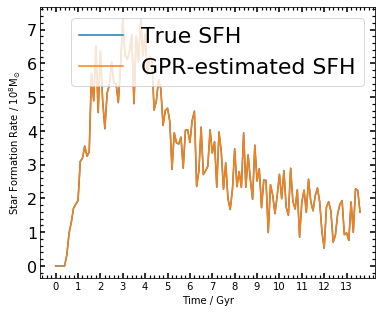

In [49]:
#Compare original SFH to best GPR prediction
plt.rcParams['xtick.top']=True
plt.rcParams['xtick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['xtick.major.size']=5.4
plt.rcParams['xtick.minor.size']=3
plt.rcParams['xtick.major.width']=1.6
plt.rcParams['xtick.minor.width']=1.2
plt.rcParams['ytick.right']=True
plt.rcParams['ytick.direction']='in'
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['ytick.major.size']=5.4
plt.rcParams['ytick.minor.size']=3
plt.rcParams['ytick.major.width']=1.6
plt.rcParams['ytick.minor.width']=1.2

plt.figure(figsize=(6,5))
plt.plot(X,rates_train.iloc[0]*1e-8,label='True SFH')
plt.plot(X,gscv.best_estimator_.predict(X)*1e-8,label='GPR-estimated SFH')
plt.legend(fontsize=22)
plt.yticks(fontsize=16)
#reducing the amount of ticks on the X axis (when 133 too cluttered)
plt.xticks(np.arange(min(X),max(X)+0.1,1.0))
plt.ylabel('Star Formation Rate / $10^{8}\\mathrm{M_{\\odot}}$')
plt.xlabel('Time / Gyr')
plt.show()

In [19]:
#correcting negative data 
y=gscv.best_estimator_.predict(X)
for i in y:
    if i<0:
        i=0

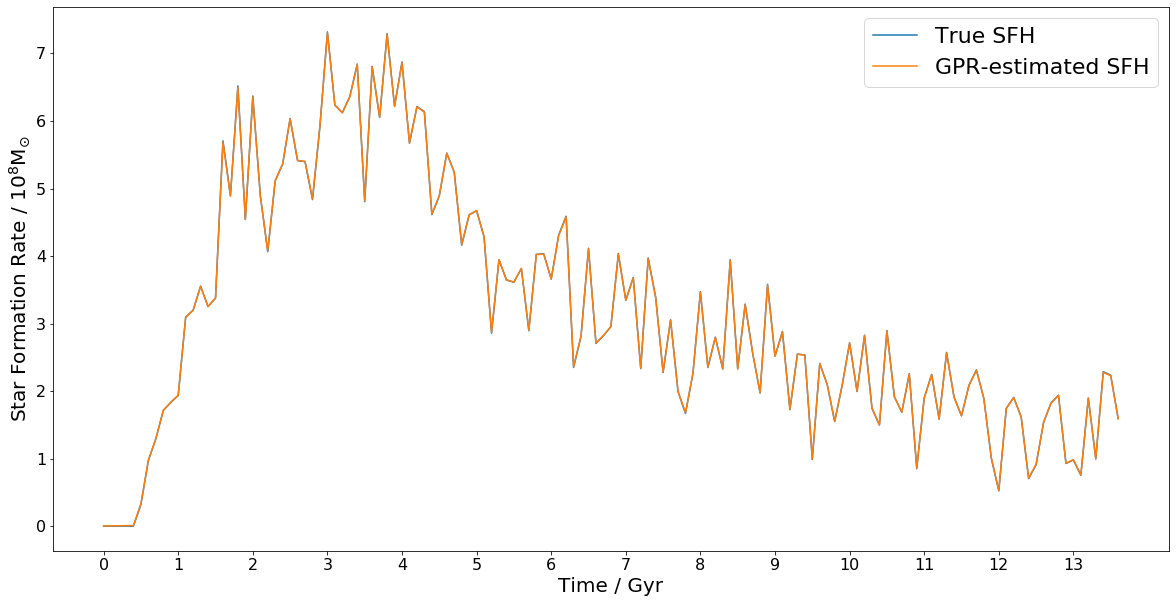

In [46]:
plt.figure(figsize=(20,10))
plt.plot(X,rates_train.iloc[0]*1e-8,label='True SFH')
plt.plot(X,y*1e-8,label='GPR-estimated SFH')
plt.legend(fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(np.arange(min(X),max(X)+0.1,1.0),fontsize=16)
plt.ylabel('Star Formation Rate / $10^{8}\\mathrm{M_{\\odot}}$',fontsize=20)
plt.xlabel('Time / Gyr',fontsize=20)
plt.show()